In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
np.random.seed(0)

In [3]:
X, y = make_circles(n_samples=400, factor=.3, noise=0.05)

In [4]:
# kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
Y_kpca = kpca.fit_transform(X)

In [5]:
# PCA without kernel 
pca = PCA()
Y_pca = pca.fit_transform(X)

In [38]:
def kernel_matrix(x, kernel=None, d=3, sigma=None, C=1.0):
    n = x.shape[0] # n == 데이터의 갯수 
    if sigma is None:
        sigma = 1.0/n
    
    xxt = x.dot(x.T)
    
    if kernel == 'polynomial':
        return (C + xxt)**d
    elif kernel == 'sigmoid':
        return np.tanh(sigma*xxt + C)
    elif kernel == 'rbf':
        A = x.dot(x.T)
        B = np.repeat(np.diag(xxt), n).reshape(n,n)
        return np.exp(-(B.T - 2*A + B)/(2*sigma**2))
    else:
        pass 

# 모든 커널 중에 rbf 커널이 가장 분리가 잘됨. 
K = kernel_matrix(X, kernel='rbf', sigma = 1/np.sqrt(20))

n = K.shape[0]
one_mat = np.repeat(1/n, n**2).reshape(n, n)

# gram 은 정규화된 데이터를 가지고 있음. 
gram = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)
eigen_vals, eigen_vecs = np.linalg.eigh(gram)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda x: x[0], reverse=True)


n_components = 2
transformed_data = []

for j in range(n):
    loc=np.zeros(n_components)
    for k in range(n_components):
        inner_prod_sum = 0.
        for i in range(n): 
            inner_prod_sum = inner_prod_sum + eigen_pairs[k][1][i] * gram[j, i]
        loc[k] = inner_prod_sum/np.sqrt(eigen_pairs[k][0])

    transformed_data.append(loc)

transformed_data = np.array(transformed_data)

In [39]:
transformed_data

array([[-0.05334396, -0.31898569],
       [-0.47759205,  0.48079553],
       [-0.30242217,  0.27587129],
       [-0.03853689, -0.32080335],
       [ 0.05311454,  0.36534163],
       [-0.04989381, -0.32339247],
       [-0.04778383, -0.31577313],
       [-0.22928212,  0.40056304],
       [-0.05139199, -0.31694304],
       [ 0.61918832,  0.30416625],
       [-0.0397359 , -0.30892683],
       [-0.0539708 , -0.31765532],
       [-0.05128072, -0.3078719 ],
       [-0.11317849,  0.2519565 ],
       [-0.03691661, -0.32064517],
       [-0.04889114, -0.32110313],
       [-0.58725332,  0.39721335],
       [-0.05008645, -0.31508188],
       [ 0.70904021,  0.23149836],
       [-0.04152743, -0.31831571],
       [-0.04335295, -0.31188954],
       [-0.28273936,  0.32696706],
       [-0.04977248, -0.30644787],
       [-0.23374154,  0.28539636],
       [-0.03859653, -0.30956425],
       [-0.56760851,  0.43321196],
       [-0.05063637, -0.3056852 ],
       [-0.0374674 , -0.31941993],
       [-0.3382875 ,

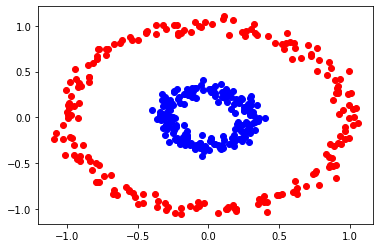

In [40]:
reds  = y == 0
blues = y == 1

# original space 
plt.scatter(X[reds,0],  X[reds,1],  c="red")
plt.scatter(X[blues,0], X[blues,1], c="blue")
plt.show()

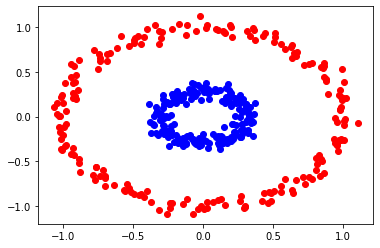

In [41]:
# PCA without Kernel 
plt.scatter(Y_pca[reds,0],  Y_pca[reds,1],  c="red")
plt.scatter(Y_pca[blues,0], Y_pca[blues,1], c="blue")
plt.show()
# 그냥 pca 는 선형으로 구분이 되지 않음 

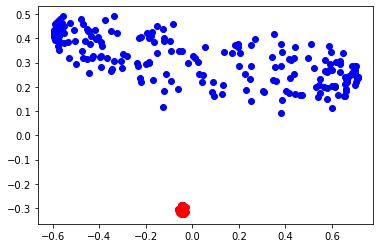

In [42]:
# kernel PCA + my code 
plt.scatter(transformed_data[reds, 0],  transformed_data[reds, 1],  c="red")
plt.scatter(transformed_data[blues,0],  transformed_data[blues,1], c="blue")
plt.show()
# Kernel pca 는 선형으로 구분이 가능함 